# Лекция 3.3. Matplotlib, Seaborn и Plotly. Визуализация данных

## Matplotlib

**Matplotlib** — библиотека на языке программирования Python для визуализации данных двумерной графикой. Получаемые изображения могут быть использованы в качестве иллюстраций в публикациях.
Официальная документация представлена здесь: https://matplotlib.org/


### Импорт модуля Pandas и Matplotlib

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

Заметим, что мы импортировали из библиотеки только модуль pyplot, который как раз и отвечает за построение графиков.

### Основные возможности Matplotlib

Создадим датафрейм. Сделаем это не из файла, а сразу зададим все данные в коде. Такой способ описания тоже существует. Наш датафрейм будет описывать некоторую информацию о людях: имя, возраст, пол, штат проживания, количество детей, количество домашних питомцев:

In [2]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})
df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


Pandas имеет очень хорошую интеграцию с Matplotlib - мы можем построить график с данными непосредственно из датафрейма, просто вызвав метод plot(). Для отображения графика, воспользуемся командой show().

Построим диаграмму рассеяния - scatter plot, на которой отобразим зависимость num_children и num_pets:

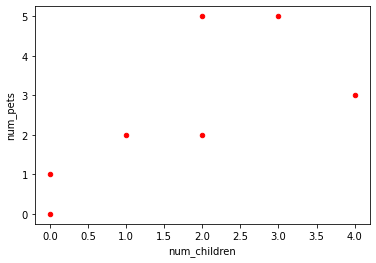

In [3]:
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()

Также мы можем построить гистограмму - bar plot. Отобразим, например, возраст людей из нашего датафрейма:

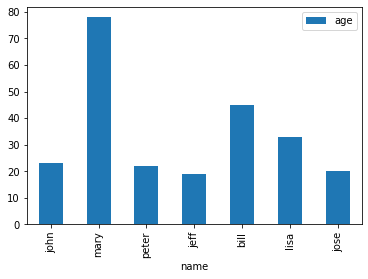

In [4]:
df.plot(kind='bar',x='name',y='age')
plt.show()

Теперь давайте построим линейную диаграмму на основе данных из нескольких столбцов.

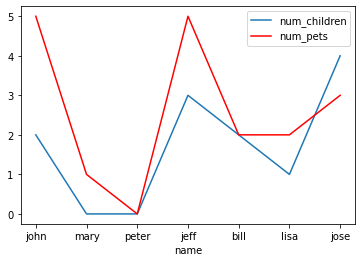

In [5]:
axis = plt.gca() # для того, чтобы построить графики на одной оси, нам необходимо получить текущую ось и сохранить ее в переменную
df.plot(kind='line',x='name',y='num_children',ax=axis) # здесь и в следующем графике используем ось из нашей переменной
df.plot(kind='line',x='name',y='num_pets', color='red', ax=axis)
plt.show()

Построим гистограмму с группировкой по полю state.

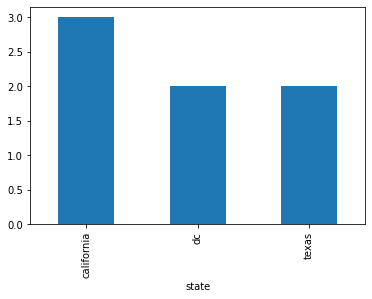

In [6]:
df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()

При группировке идет подсчет количества уникальных записей name, причем уникальных, за счет метода unique(), а затем их распределение по штатам state.

Теперь построим гистограмму с накоплением и группировкой. Группировать будем по штату state и полу gender:

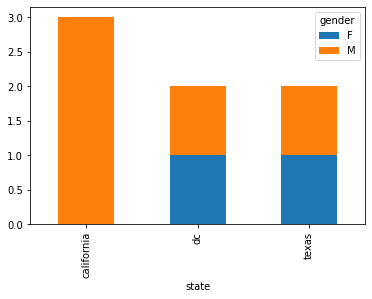

In [7]:
df.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Следующий пример - посчитаем людей по полу с разбивкой по штатам:



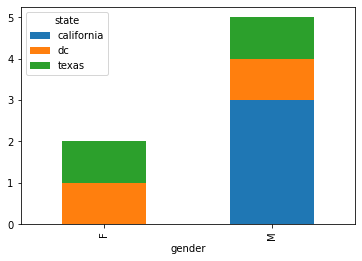

In [8]:
df.groupby(['gender','state']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Построим тот же самый график, но с применением нормализации к 100%:

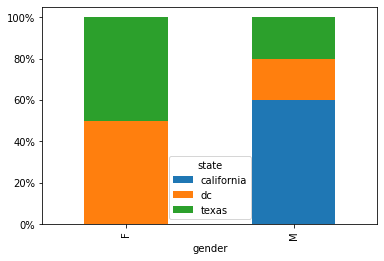

In [9]:
import matplotlib.ticker as mtick
df.groupby(['gender','state']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Можно также построить гистограмму по значениям столбцов, например, если мы хотим оценить количество людей разных возрастных групп. Возьмем деления между группами - 0, 20, 40, 60, 80 и 100:


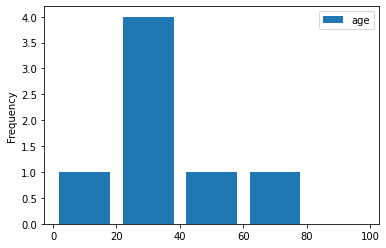

In [10]:
df[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

Мы также можем строить графики, оперирующие со временем. Чтобы составить график количества записей за единицу времени, мы должны:
1. преобразовать столбец даты в datetime, используя to_datetime();
2. вызвать метод plot(kind = 'hist'):

In [11]:
# создадим новый датафрейм, в котором будет столбец с датой рождения в формате (m/d/y) - месяц, день, год
df = pd.DataFrame({
    'name':[
        'john','lisa','peter','carl','linda','betty'
    ],
    'date_of_birth':[
        '01/21/1988','03/10/1977','07/25/1999','01/22/1977','09/30/1968','09/15/1970'
    ]
})
df

,name,date_of_birth
0,john,01/21/1988
1,lisa,03/10/1977
2,peter,07/25/1999
3,carl,01/22/1977
4,linda,09/30/1968
5,betty,09/15/1970


Теперь преобразуем столбец даты в тип datetime и воспользуемся методом plot(kind = 'hist'):

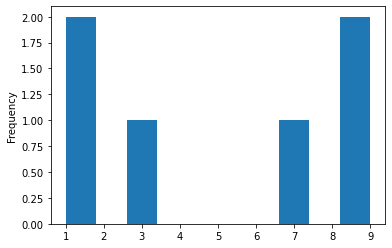

In [12]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], infer_datetime_format=True)
df['date_of_birth'].map(lambda d: d.month).plot(kind='hist')
plt.show()

Мы можем также применить различные настройки форматирования графика, например, сделать заголовок по оси x и клеточку:

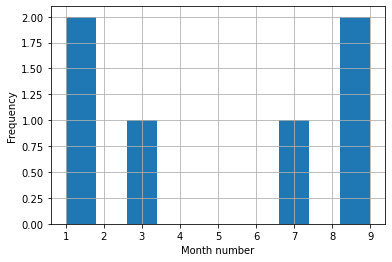

In [13]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], infer_datetime_format=True)
df['date_of_birth'].map(lambda d: d.month).plot(kind='hist')
plt.grid()
plt.xlabel('Month number')
plt.show()

Подробнее про форматирование графиков можно прочитать здесь, а также другие функции matplotlib можно прочитать в официальной документации здесь: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.html

Увеличим дефолтный размер графиков:


In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Также мы можем поменять формат графиков на SVG, поскольку графики будут иметь более красивый вид:

In [0]:
%config InlineBackend.figure_format = 'svg' 

Загрузим в DataFrame новые данные, с которыми будем работать. Для примеров выбраны данные о продажах и оценках видео-игр из [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

In [16]:
df = pd.read_csv('https://github.com/Eductorium/DataScience/raw/master/Module2/data/video_games_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Данные есть не для всех игр, поэтому давайте оставим только те записи, в которых нет пропусков, с помощью метода dropna

In [17]:
df = df.dropna()
print(df.shape)

(6825, 16)


Некоторые признаки, которые pandas считал как object, явно приведем к типам float или int.

In [0]:
df = df.dropna()
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

Всего в таблице 6825 объектов и 16 признаков для них. Посмотрим на несколько первых записей c помощью метода head, чтобы убедиться, что все распарсилось правильно. Для удобства оставим только те признаки, которые мы будем в дальнейшем использовать:

In [19]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


Построим график продаж видео игр в различных странах в зависимости от года. Для начала отфильтруем только нужные нам столбцы (в цикле: x for x in df.columns if 'Sales' in x, где содержится слово "Продажи" - 'Sales' in x), затем посчитаем суммарные продажи по годам и у получившегося DataFrame вызовем функцию plot без параметров.

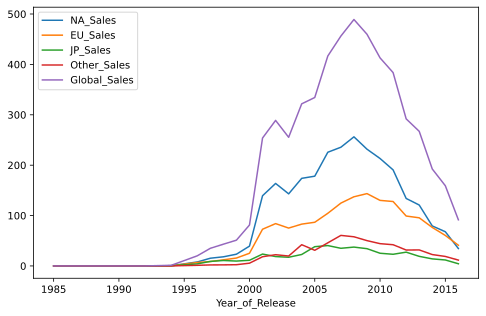

In [20]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

Напомним, что реализация функции plot в pandas основана на библиотеке matplotlib.
C помощью параметра kind можно изменить тип графика, например, на bar chart. Matplotlib позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметр rot отвечает за угол наклона подписей к оси x.



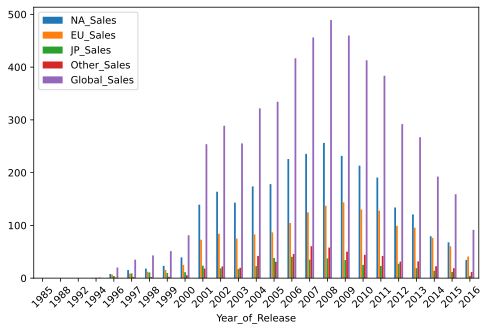

In [21]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

## Seaborn

**Seaborn** - более высокоуровневое API на базе библиотеки Matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

### Импорт модуля Seaborn

In [22]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Основные виды графиков

Познакомимся с первым таким "сложным" типом графиков pair plot (scatter plot matrix). Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.

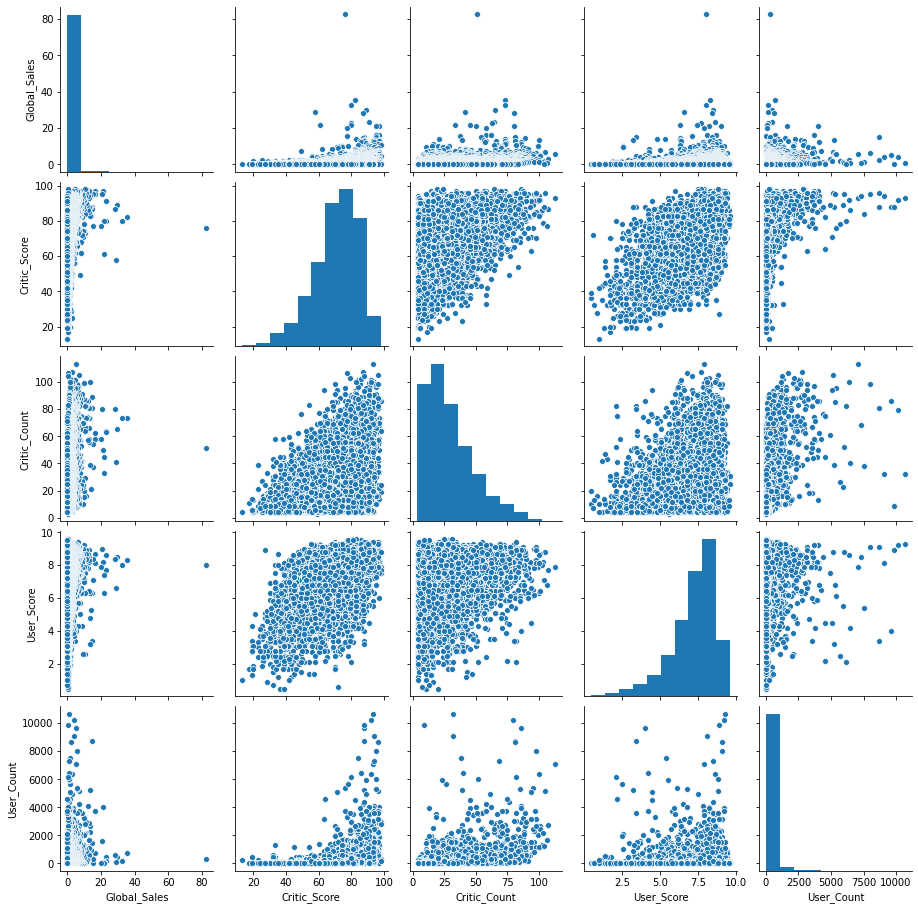

In [23]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png' 
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])

Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные диаграммы рассеяния (scatter plots) для соответствующих пар признаков.

Для сохранения графиков в файлы стоит использовать метод savefig, например:  sns_plot.savefig('pairplot.png')

С помощью seaborn можно построить и распределение dist plot. Для примера посмотрим на распределение оценок критиков Critic_Score. По умолчанию на графике отображается гистограмма и [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

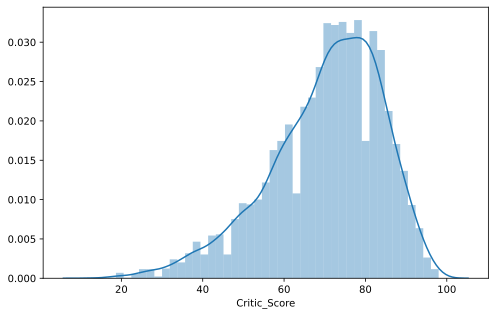

In [24]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(df.Critic_Score)

Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и joint plot — это гибрид scatter plot и histogram. Посмотрим на то, как связаны между собой оценка критиков Critic_Score и оценка пользователя User_Score.

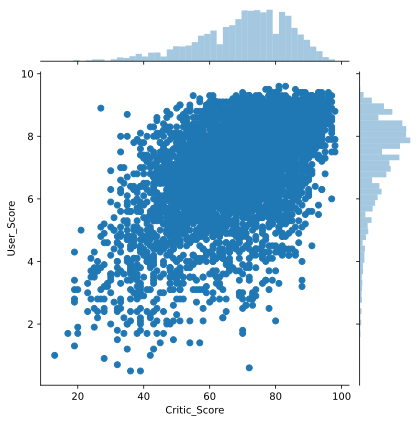

In [25]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

Еще один полезный тип графиков — это box plot. Давайте сравним оценки игр от критиков для топ-5 крупнейших игровых платформ.

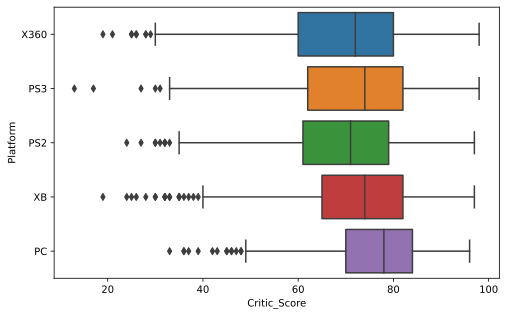

In [28]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")

Обсудим немного подробнее, как же понимать box plot. Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения.
С коробкой разобрались, перейдем к усам. Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 — интерквартильный размах. Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

Для понимания лучше один раз увидеть, поэтому вот еще и картинка с [Wikipedia](https://en.wikipedia.org/wiki/Box_plot):

![](https://github.com/Eductorium/DataScience/raw/master/Module2/img/box_diag.png)

Еще один тип графиков - это heat map. Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем суммарные продажи игр по жанрам и игровым платформам.

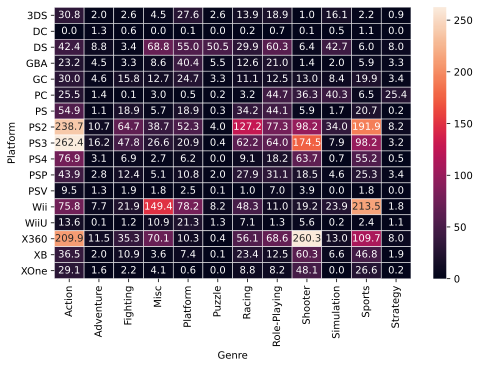

In [27]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

## Plotly